# Auto reload modules

In [34]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
import pandas as pd

# Tarea 1

## Ejercicio 1

Se realizó un estudio para determinar si ciertas medidas de la fuerza estática del brazo influyen en las características de “levantamiento dinámico” de un individuo. Veinticinco individuos se sometieron a pruebas de fuerza y luego se les pidió que hicieran una prueba de levantamiento de peso, en el que el peso se elevaba en forma dinámica por encima de la cabeza. A continuación se presentan los datos.

In [36]:
data = {
    # 'Individual': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25],
    'Fuerza_brazo_x': [17.3, 19.3, 19.5, 19.7, 22.9, 23.1, 26.4, 26.8, 27.6, 28.1, 28.2, 28.7, 29.0, 29.6, 29.9, 29.9, 30.3, 31.3, 36.0, 39.5, 40.4, 44.3, 44.6, 50.4, 55.9],
    'Levantamiento_dinamico_y': [71.7, 48.3, 88.3, 75.0, 91.7, 100.0, 73.3, 65.0, 75.0, 88.3, 68.3, 96.7, 76.7, 78.3, 60.0, 71.7, 85.0, 85.0, 88.3, 100.0, 100.0, 100.0, 91.7, 100.0, 71.7]
}

df = pd.DataFrame(data)
# df.set_index('Individual', inplace=True)

df

,Fuerza_brazo_x,Levantamiento_dinamico_y
0,17.3,71.7
1,19.3,48.3
2,19.5,88.3
3,19.7,75.0
4,22.9,91.7
5,23.1,100.0
6,26.4,73.3
7,26.8,65.0
8,27.6,75.0
9,28.1,88.3


### a. Realice el diagrama de dispersión entre las variables, obtenga e interpreta las estadisticas descriptivas de las mismas.

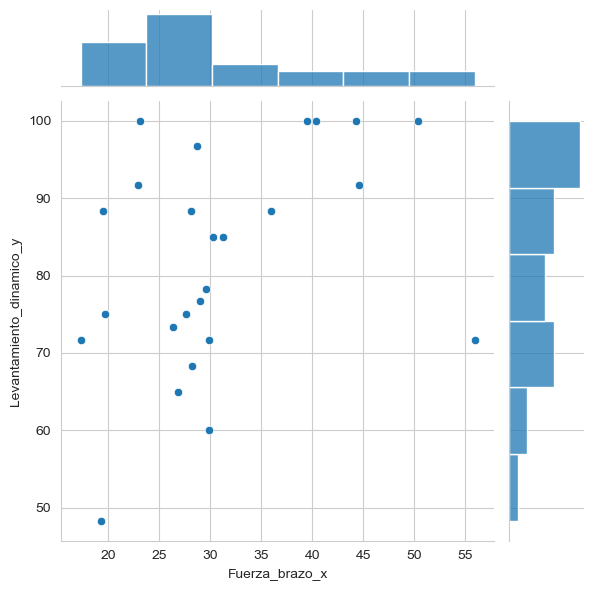

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
sns.jointplot(data=df, x='Fuerza_brazo_x', y='Levantamiento_dinamico_y')
plt.show()

In [38]:
df.describe()

,Fuerza_brazo_x,Levantamiento_dinamico_y
count,25.000000,25.000000
mean,31.148000,82.000000
std,9.867207,14.129549
min,17.300000,48.300000
25%,26.400000,71.700000
50%,29.000000,85.000000
75%,36.000000,91.700000
max,55.900000,100.000000


In [39]:
print(f"Rango para Fuerza brazo x = {df['Fuerza_brazo_x'].max() - df['Fuerza_brazo_x'].min():.2f} ")
print(f"Rango para Levantamiento dinamico y = {df['Levantamiento_dinamico_y'].max() - df['Levantamiento_dinamico_y'].min():.2f} ")

Rango para Fuerza brazo x = 38.60 
Rango para Levantamiento dinamico y = 51.70 


- Se puede observar que en el caso de la columna "Fuerza del brazo x", tiene una mayor desviación estándar que la columna de "Levantamiento dinámico".
- Para la variable "x" el rango es menor.
- Como primera impresión, no se ven muy correlacionados. 
- Cuentan con medidas de tendencia central diferentes.
- Gran parte de los datos se encuentran entre 25 a 30 en "x", y 90 a 100 en "y".

### b. Calcule el coeﬁciente de correlación lineal y reliace la prueba de hipótesis correspondiente para validar si existe o no relación lineal entre las variable, con una signiﬁcancia del 5%.

*Notas:*

La función `pearsonr` de la librería `scipy.stats` se utiliza para calcular el coeficiente de correlación de Pearson y el p-valor correspondiente. Este coeficiente mide la fuerza y la dirección de la relación lineal entre dos variables. A continuación te explico cómo funciona:

### ¿Qué es el coeficiente de correlación de Pearson?
El coeficiente de correlación de Pearson, denotado como $ r $, es un valor que oscila entre -1 y 1:

- **$ r = 1 $**: Indica una correlación positiva perfecta; cuando una variable aumenta, la otra también lo hace de manera proporcional.
- **$ r = -1 $**: Indica una correlación negativa perfecta; cuando una variable aumenta, la otra disminuye de manera proporcional.
- **$ r = 0 $**: Indica que no hay una relación lineal entre las variables.

### ¿Cómo se usa la función `pearsonr`?
La función `pearsonr` toma dos argumentos: las dos series de datos para las cuales deseas calcular la correlación. Retorna dos valores:

1. **Coeficiente de correlación de Pearson ($ r $)**: Indica la fuerza y la dirección de la relación lineal entre las dos variables.
2. **P-valor**: Indica la probabilidad de observar un coeficiente de correlación tan extremo como el calculado, bajo la suposición de que no existe correlación en la población (es decir, bajo la hipótesis nula de $ r = 0 $).

### Ejemplo de uso
Supongamos que tienes dos conjuntos de datos, `x` y `y`, y deseas calcular la correlación entre ellos:

```python
from scipy.stats import pearsonr

# Datos de ejemplo
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

# Calcular el coeficiente de correlación y el p-valor
r, p_value = pearsonr(x, y)

print(f"Coeficiente de correlación: {r:.2f}")
print(f"P-valor: {p_value:.5f}")
```

### Interpretación
- **Coeficiente de correlación ($ r $)**: Indica la magnitud de la correlación. Por ejemplo, un valor cercano a 1 o -1 indica una fuerte correlación.
- **P-valor**: Se utiliza para realizar la prueba de hipótesis. Si el p-valor es menor que un nivel de significancia (por ejemplo, 0.05), se rechaza la hipótesis nula y se concluye que existe una correlación significativa entre las variables.

### Internamente, ¿cómo funciona `pearsonr`?
Internamente, la función `pearsonr` realiza los siguientes pasos:

1. **Cálculo del coeficiente $ r $**:
   $$
   r = \frac{\sum{(x_i - \bar{x})(y_i - \bar{y})}}{\sqrt{\sum{(x_i - \bar{x})^2} \sum{(y_i - \bar{y})^2}}}
   $$
   Donde $\bar{x} $ y $ \bar{y} $ son las medias de las series $ x $ y $ y $.

2. **Cálculo del p-valor**:
   - Asume que las variables tienen una distribución normal conjunta.
   - Utiliza el valor de $ r $ y el número de datos para calcular el estadístico de prueba $ t $, y posteriormente obtiene el p-valor.

### Ventajas de usar `pearsonr`
- **Facilidad de uso**: La función maneja todo el cálculo internamente, proporcionando directamente el coeficiente y el p-valor.
- **Precisión**: La implementación en `scipy.stats` es eficiente y está optimizada para manejar una amplia gama de casos de uso.

### Limitaciones
- **Suposición de linealidad**: `pearsonr` solo mide relaciones lineales. No es adecuado para relaciones no lineales.
- **Sensibilidad a valores atípicos**: Unos pocos valores atípicos pueden influir fuertemente en el valor de $ r $.
  
En resumen, `pearsonr` es una herramienta poderosa y fácil de usar para evaluar la relación lineal entre dos conjuntos de datos, permitiendo también realizar pruebas de hipótesis estadísticas para validar la significancia de esa relación.

In [40]:
coef_corr = df['Fuerza_brazo_x'].corr(df['Levantamiento_dinamico_y'])
print(f"Coeficiente de correlación: {coef_corr:.2f}")

Coeficiente de correlación: 0.39


El coeficiente de correlación implica que existe una baja corelación lineal entre los datos. 

In [41]:
from scipy.stats import pearsonr
coef_corr, p_value = pearsonr(df['Fuerza_brazo_x'], df['Levantamiento_dinamico_y'])
print(f"Coeficiente de correlación: {coef_corr:.2f}")
print(f"P-valor: {p_value:.5f}")

Coeficiente de correlación: 0.39
P-valor: 0.05282


In [42]:
if p_value < 0.05:
    print("Rechazamos la hipótesis nula. Existe una relación lineal significativa entre las variables.")
else:
    print("No se puede rechazar la hipótesis nula. No hay evidencia suficiente para afirmar que existe una relación lineal significativa entre las variables.")

No se puede rechazar la hipótesis nula. No hay evidencia suficiente para afirmar que existe una relación lineal significativa entre las variables.


### Estime los coeﬁcientes del modelo de regresión lineal simple por MCO.

#### Solución manual

Cálculo de los coeficientes:

$$ b_1 = \frac{n \displaystyle \sum_{i=1}^{n} x_iy_i - (\displaystyle \sum_{i=1}^{n}x_i)( \displaystyle \sum_{i=1}^{n}y_i)}{n \displaystyle \sum_{i=1}^{n}x_{i}^{2}  - (\displaystyle \sum_{i=1}^{n}x_i)^2} = \frac{\displaystyle \sum_{i=1}^{n}((x_i-\bar{x})(y_i-\bar{y}))}{\displaystyle \sum_{i=1}^{n}(x_i-\bar{x})^2} $$

$$ b_0 = \frac{\displaystyle \sum_{i=1}^{n} y_i - b_1 \displaystyle \sum_{i=1}^{n} x_i }{n} = \bar{y} - b_1 \bar{x} $$

$$ \hat{y} = b_0 + b_1 x $$

$$ r = \frac{\displaystyle \sum (x-\bar{x})(y-\bar{y})}{\sqrt{\displaystyle \sum (x-\bar{x})^2} \sqrt{\displaystyle \sum (y-\bar{y})^2} } = \sqrt{1 - \frac{\sum(y-\hat{y})^2}{\sum(y-\bar{y})^2}} $$

In [43]:
import numpy as np
df_cop = df.copy()
df_cop['x_bar'] = df_cop['Fuerza_brazo_x'].mean()
df_cop['y_bar'] = df_cop['Levantamiento_dinamico_y'].mean()

df_cop['x-x_bar'] = df_cop['Fuerza_brazo_x'] - df_cop['x_bar']
df_cop['y-y_bar'] = df_cop['Levantamiento_dinamico_y'] - df_cop['y_bar']

df_cop['num_b1'] = df_cop['x-x_bar'] * df_cop['y-y_bar']
df_cop['den_b1'] = df_cop['x-x_bar'] ** 2

df_cop.head(5)

,Fuerza_brazo_x,Levantamiento_dinamico_y,x_bar,y_bar,x-x_bar,y-y_bar,num_b1,den_b1
0,17.3,71.7,31.148,82.0,-13.848,-10.3,142.6344,191.767104
1,19.3,48.3,31.148,82.0,-11.848,-33.7,399.2776,140.375104
2,19.5,88.3,31.148,82.0,-11.648,6.3,-73.3824,135.675904
3,19.7,75.0,31.148,82.0,-11.448,-7.0,80.1360,131.056704
4,22.9,91.7,31.148,82.0,-8.248,9.7,-80.0056,68.029504


In [44]:
b1 = df_cop['num_b1'].sum() / df_cop['den_b1'].sum()
b0 = df_cop['Levantamiento_dinamico_y'].mean() - b1 * df_cop['Fuerza_brazo_x'].mean()
print(f"El coeficiente b1 = slope = {b1:.3f}")
print(f"El coeficiente b0 = intercept = {b0:.3f}")

El coeficiente b1 = slope = 0.561
El coeficiente b0 = intercept = 64.529


#### Solución mediante librerías

In [45]:
from scipy import stats
slope, intercept, r, p, std_err = stats.linregress(df_cop['Fuerza_brazo_x'], df_cop['Levantamiento_dinamico_y'])
print(f"Slope = {slope:.3f}")
print(f"Intercept = {intercept:.3f}")

Slope = 0.561
Intercept = 64.529


### d. Obtenga la estimación puntual para una fuerza del brazo de 30.

In [46]:
estimacion = 30

def y_hat(x: int | float, slope : float, intercept: float): 
    """ """
    return slope * x + intercept

print(f"Estimación puntual de {estimacion} es: {y_hat(estimacion, slope=slope, intercept=intercept)}")

Estimación puntual de 30 es: 81.35608933417738


### e. Graﬁque los residuales en comparación con la variable independiente y comente los resultados.

In [47]:
df_res = df.copy()
df_res['y_hat'] = df_res.apply(lambda row: y_hat(row['Fuerza_brazo_x'], slope=slope, intercept=intercept), axis=1)
df_res['err'] = df_res['Levantamiento_dinamico_y'] - df_res['y_hat']
df_res.head(5)

,Fuerza_brazo_x,Levantamiento_dinamico_y,y_hat,err
0,17.3,71.7,74.232687,-2.532687
1,19.3,48.3,75.354483,-27.054483
2,19.5,88.3,75.466663,12.833337
3,19.7,75.0,75.578842,-0.578842
4,22.9,91.7,77.373715,14.326285


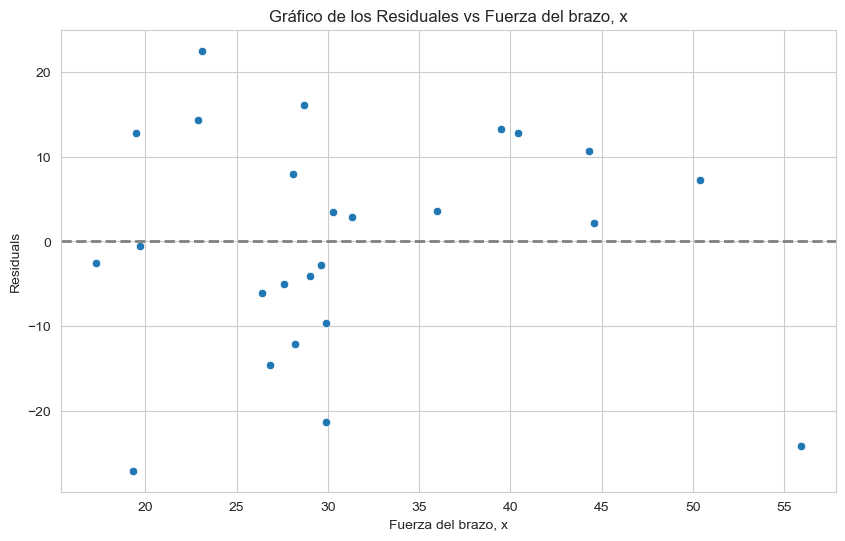

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Fuerza_brazo_x'], y=df_res['err'])
plt.axhline(0, color='gray', linestyle='--', linewidth=2)
plt.xlabel('Fuerza del brazo, x')
plt.ylabel('Residuals')
plt.title('Gráfico de los Residuales vs Fuerza del brazo, x')
plt.show()

Con librerías:

<Axes: xlabel='Fuerza_brazo_x', ylabel='Levantamiento_dinamico_y'>

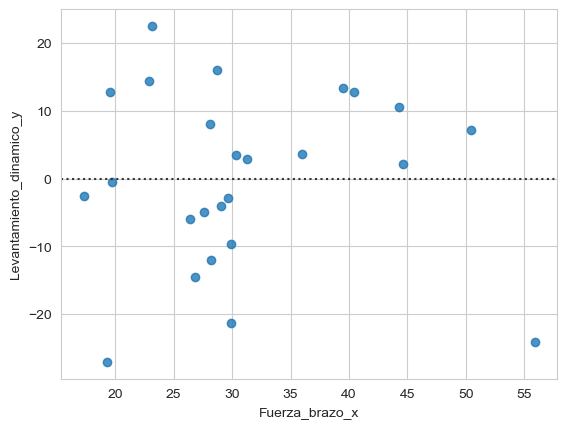

In [49]:
sns.residplot(data=df, x="Fuerza_brazo_x", y="Levantamiento_dinamico_y")

## Ejercicio 2
Doce marcas de shampoo de venta en México han compartido información acerca de sus ventas y del monto en inversión publicitaria durante 2023. Los datos anuales de ambas variables se presentan a continuación:


In [50]:
import pandas as pd
data = {
    'Marca': ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L"],
    'Venta': [2.4, 1.6, 2.3, 1.5, 3.2, 2.5, 1.8, 1.8, 3.5, 3.4, 1.5, 3.2],
    'Inversion': [6, 2, 5, 1, 4, 7, 4, 3, 8, 11, 2, 12]
}

df2 = pd.DataFrame(data)
# df.set_index('Marca', inplace=True)

df2

,Marca,Venta,Inversion
0,A,2.4,6
1,B,1.6,2
2,C,2.3,5
3,D,1.5,1
4,E,3.2,4
5,F,2.5,7
6,G,1.8,4
7,H,1.8,3
8,I,3.5,8
9,J,3.4,11


In [51]:
df2.describe()

,Venta,Inversion
count,12.000000,12.000000
mean,2.391667,5.416667
std,0.768065,3.528026
min,1.500000,1.000000
25%,1.750000,2.750000
50%,2.350000,4.500000
75%,3.200000,7.250000
max,3.500000,12.000000


In [52]:
# Cálculo del rango

print(f"Rango para la columna Venta son de {df2['Venta'].max() - df2['Venta'].min()} Millones de litros")
print(f"Rango para la columna Inversion son de {df2['Inversion'].max() - df2['Inversion'].min()} Millones de pesos")
df_corr = df2['Venta'].corr(df2['Inversion'])
print(f"El coeficiente de correlación es: {df_corr:.3f}")

Rango para la columna Venta son de 2.0 Millones de litros
Rango para la columna Inversion son de 11 Millones de pesos
El coeficiente de correlación es: 0.833


Diagrama de dispersión

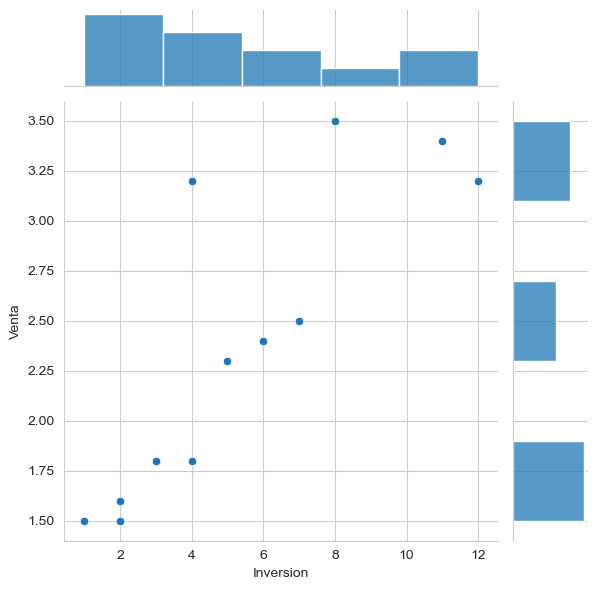

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.jointplot(data=df2, x="Inversion", y="Venta")

*Observaciones*

- Existe una alta correlación entre las variables.
- El rango de las variables no es muy alto.
- Hay una mayor concentración en la columna venta que en inversión

### b. Calcule el intervalo de conﬁanza al 95% para coeﬁciente de correlación lineal

Para calcular el intervalo de confianza al 95% para el coeficiente de correlación lineal (r), puedes usar la transformación de Fisher para convertir la correlación a una escala donde el intervalo de confianza es más fácil de calcular. Luego, transformas el intervalo de confianza de vuelta a la escala original.

Aquí tienes los pasos:

1. **Transforma la correlación con la transformación de Fisher:**

   La transformación de Fisher se define como:

   $$ z = \frac{1}{2} \ln\left(\frac{1 + r}{1 - r}\right) $$
   

   Donde $ r $ es el coeficiente de correlación.

2. **Calcula el intervalo de confianza para $ z $:**

   Para un intervalo de confianza del 95%, se usa una distribución normal estándar. El intervalo de confianza para $ z $ es:

   $$
   z \pm z_{0.025} \cdot \frac{1}{\sqrt{n - 3}}
   $$

   Aquí, $ z_{0.025} $ es el valor crítico de la distribución normal estándar para un nivel de confianza del 95% (aproximadamente 1.96), y $ n $ es el número de pares de datos.

3. **Transforma el intervalo de vuelta a la escala de $ r $:**

   La transformación inversa de Fisher es:

   $$
   r = \frac{e^{2z} - 1}{e^{2z} + 1}
   $$

   Donde $ e $ es la base del logaritmo natural.


En este código, reemplaza `r` con el coeficiente de correlación que tienes y `n` con el número de pares de datos para obtener el intervalo de confianza.

In [54]:
import numpy as np
import scipy.stats as stats

def confidence_interval_r(r, n, confidence=0.95):
    # Transformación de Fisher
    z = 0.5 * np.log((1 + r) / (1 - r))
    
    # Intervalo de confianza para z
    z_critical = stats.norm.ppf((1 + confidence) / 2)
    se_z = 1 / np.sqrt(n - 3)
    z_low = z - z_critical * se_z
    z_high = z + z_critical * se_z
    
    # Transformación inversa de Fisher
    r_low = (np.exp(2 * z_low) - 1) / (np.exp(2 * z_low) + 1)
    r_high = (np.exp(2 * z_high) - 1) / (np.exp(2 * z_high) + 1)
    
    return r_low, r_high

# Ejemplo
r = df_corr  # Coeficiente de correlación
n = len(df2['Venta'])   # Número de pares de datos
ci = confidence_interval_r(r, n)
print(f"Intervalo de confianza al 95% para r: {ci}")

Intervalo de confianza al 95% para r: (0.4974210995327289, 0.9519823610817848)


### c. Estime los coeﬁcientes del modelo de regresión lineal simple por MCO. 

*Usando la referencia del ejercicio pasado*

In [83]:
import econ_mod.econ_utils as econ
df_cop = econ.create_cop_df(df=df2, x="Inversion", y="Venta")
df_cop.head(5)

,Marca,Venta,Inversion,x_bar,y_bar,x-x_bar,y-y_bar,num_b1,den_b1
0,A,2.4,6,5.416667,2.391667,0.583333,0.008333,0.004861,0.340278
1,B,1.6,2,5.416667,2.391667,-3.416667,-0.791667,2.704861,11.673611
2,C,2.3,5,5.416667,2.391667,-0.416667,-0.091667,0.038194,0.173611
3,D,1.5,1,5.416667,2.391667,-4.416667,-0.891667,3.938194,19.506944
4,E,3.2,4,5.416667,2.391667,-1.416667,0.808333,-1.145139,2.006944


In [84]:
b1, b0 = econ.get_lr_metrics(df_cop=df_cop, x="Inversion", y="Venta")
print(f"El coeficiente b1 = slope = {b1:.3f}")
print(f"El coeficiente b0 = intercept = {b0:.3f}")

El coeficiente b1 = slope = 0.181
El coeficiente b0 = intercept = 1.409


In [86]:
df_res = econ.create_res_df(df=df2, slope=b1, intercept=b0, x="Inversion", y="Venta")
df_res.head(5)

,Marca,Venta,Inversion,y_hat,err_hat,err_bar
0,A,2.4,6,2.497505,-0.097505,0.008333
1,B,1.6,2,1.771759,-0.171759,-0.791667
2,C,2.3,5,2.316068,-0.016068,-0.091667
3,D,1.5,1,1.590323,-0.090323,-0.891667
4,E,3.2,4,2.134632,1.065368,0.808333


Usando librerías:

In [87]:
import statsmodels.formula.api as smf
model_df2 = (
    smf.ols(
        formula='Venta ~ Inversion',
        data=df_cop
    )
    .fit()
)

In [88]:
model_df2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.664   
Dependent Variable: Venta            AIC:                16.4448 
Date:               2024-08-13 20:02 BIC:                17.4146 
No. Observations:   12               Log-Likelihood:     -6.2224 
Df Model:           1                F-statistic:        22.74   
Df Residuals:       10               Prob (F-statistic): 0.000759
R-squared:          0.695            Scale:              0.19820 
-------------------------------------------------------------------
              Coef.    Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept     1.4089     0.2429   5.8008   0.0002   0.8677   1.9500
Inversion     0.1814     0.0380   4.7687   0.0008   0.0967   0.2662
-----------------------------------------------------------------
Omnibus:               11.921       Durbin-Watson:          2.071
Prob(Omnibus):         0.003        Jarque-Bera (JB):       6.777
Skew:                  1.663        Prob(JB):               0.034
Kurtosis:              4.577        Condition No.:          12   
=================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
"""

### d. Utilizando un nivel de signiﬁcancia del 5%, pruebe la hipótesis estadística de que por cada 500mil pesos adicionales de inversión anual en redes sociales, se espera un incremento en las ventas anuales de shampoo mayor a 50 mil litros.

## 3. El siguiente juego de datos describe la producción de esencia ﬂoral en una comunidad en Francia. La variable independiente (X) se refiere a la cantidad de flores procesadas para extraer su esencia por cada productor. La variable dependiente (Y) es una medida del aceite extraído en onzas por la cantidad de ores (en miles de unidades) procesadas.

In [60]:
import pandas as pd
data = {
    'cons': [1,1.08,1.15,1.15,1.2,1.3,1.37,1.37,1.43,1.46,1.52,1.57,1.65,1.65,1.65,1.66,1.87,2.03,2.05,2.3],
    'acres': [1.71,1.52,1.23,3.09,2.21,2.26,2.4,2.1,1.96,2.09,2.02,1.31,2.17,2.28,2.41,2.23,3.04,2.06,2.73,2.36]
}

df3 = pd.DataFrame(data)
# df.set_index('Marca', inplace=True)

df3

,cons,acres
0,1.00,1.71
1,1.08,1.52
2,1.15,1.23
3,1.15,3.09
4,1.20,2.21
5,1.30,2.26
6,1.37,2.40
7,1.37,2.10
8,1.43,1.96
9,1.46,2.09


### a. Graﬁque los datos en un diagrama de dispersión.

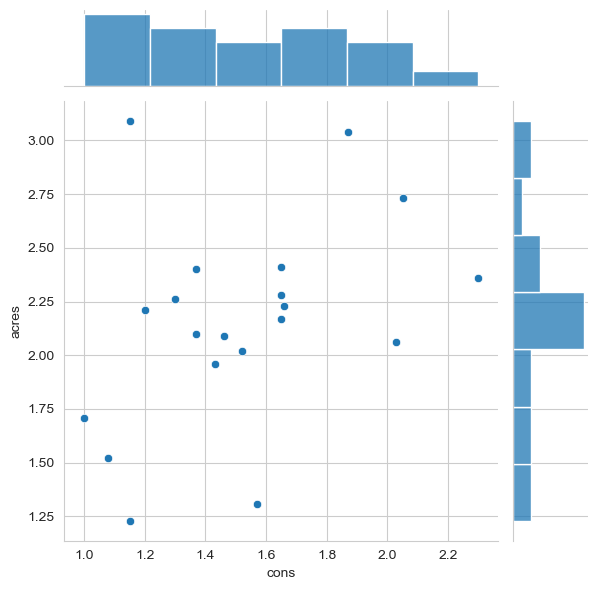

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.jointplot(data=df3, x="cons", y="acres")

### b. ¿Cree que exista una relación entre la producción de esencia y la cantidad de flores procesadas? ¿Es esta positiva o negativa?

In [62]:
df3.describe()

,cons,acres
count,20.000000,20.00000
mean,1.523000,2.15900
std,0.347155,0.48307
min,1.000000,1.23000
25%,1.275000,2.00500
50%,1.490000,2.19000
75%,1.652500,2.37000
max,2.300000,3.09000


In [63]:
corr_df3 = df3['cons'].corr(df3['acres'])
print(f"El coeficiente de correlación lineal es: {corr_df3:.3f}")

El coeficiente de correlación lineal es: 0.378


*Obervaciones*

Dato que el coeficiente de correlación lineal es bajo, implica que si bien existe una relación esta no es muy alta. Al ser mayor que cero, implica que la correlación es positiva.

### c. Por medio del ajuste de una línea recta, verifique que:
$bo$ = 1.38, $b1$ = 0.52, $S^2$ = 0.206

In [90]:
df_cop = econ.create_cop_df(df=df3, x="cons", y="acres")
df_cop.head(5)

,cons,acres,x_bar,y_bar,x-x_bar,y-y_bar,num_b1,den_b1
0,1.00,1.71,1.523,2.159,-0.523,-0.449,0.234827,0.273529
1,1.08,1.52,1.523,2.159,-0.443,-0.639,0.283077,0.196249
2,1.15,1.23,1.523,2.159,-0.373,-0.929,0.346517,0.139129
3,1.15,3.09,1.523,2.159,-0.373,0.931,-0.347263,0.139129
4,1.20,2.21,1.523,2.159,-0.323,0.051,-0.016473,0.104329


In [91]:
b1, b0 = econ.get_lr_metrics(df_cop=df_cop, x="cons", y="acres")
print(f"El coeficiente b1 = slope = {b1:.3f}")
print(f"El coeficiente b0 = intercept = {b0:.3f}")

El coeficiente b1 = slope = 0.526
El coeficiente b0 = intercept = 1.358


In [93]:
df_res = econ.create_res_df(df=df3, slope=b1, intercept=b0, x="cons", y="acres")
df_res.head(5)

,cons,acres,y_hat,err_hat,err_bar
0,1.00,1.71,1.883853,-0.173853,-0.449
1,1.08,1.52,1.925940,-0.405940,-0.639
2,1.15,1.23,1.962767,-0.732767,-0.929
3,1.15,3.09,1.962767,1.127233,0.931
4,1.20,2.21,1.989072,0.220928,0.051


In [67]:
r2 = np.sqrt(1- (df_res['err_hat'].sum() ** 2)/(df_res['err_bar'].sum() ** 2))
print(f"El valor de r^2 o S^2 es: {r2:.3f}")

El valor de r^2 o S^2 es: 0.371


Validando con librería

In [68]:
from scipy import stats
slope, intercept, r, p, std_err = stats.linregress(df3['cons'], df3['acres'])
print(f"Slope = {slope:.3f}")
print(f"Intercept = {intercept:.3f}")
print(f"Std_err = {std_err:.3f}")

Slope = 0.526
Intercept = 1.358
Std_err = 0.304


In [96]:
import statsmodels.formula.api as smf
model_1 = (
    smf.ols(
        formula='acres ~ cons',
        data=df3
    )
    .fit()
)

In [97]:
model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                Results: Ordinary least squares
================================================================
Model:              OLS              Adj. R-squared:     0.095  
Dependent Variable: acres            AIC:                27.5430
Date:               2024-08-13 20:05 BIC:                29.5345
No. Observations:   20               Log-Likelihood:     -11.772
Df Model:           1                F-statistic:        3.002  
Df Residuals:       18               Prob (F-statistic): 0.100  
R-squared:          0.143            Scale:              0.21111
------------------------------------------------------------------
            Coef.    Std.Err.     t      P>|t|     [0.025   0.975]
------------------------------------------------------------------
Intercept   1.3578     0.4737   2.8662   0.0103    0.3625   2.3530
cons        0.5261     0.3036   1.7326   0.1003   -0.1118   1.1640
----------------------------------------------------------------
Omnibus:               2.889       Durbin-Watson:          2.152
Prob(Omnibus):         0.236       Jarque-Bera (JB):       1.168
Skew:                  0.400       Prob(JB):               0.558
Kurtosis:              3.873       Condition No.:          10   
================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
"""

### d. Construya la tabla de análisis de varianza (anova) y realice la prueba de significancia para la regresión. ¿Es esta significativa o no?

In [71]:
from scipy.stats import f_oneway
stat, p = f_oneway(df_res['acres'], df_res['y_hat'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably the same distribution')
else:
 print('Probably different distributions')

stat=0.000, p=1.000
Probably the same distribution


### e. Encuentre el error estándar de la pendiente y un intervalo de conﬁanza al 95%.

### f. ¿Qué porcentaje de la variabilidad total de la respuesta es explicado por el modelo? (Sugerencia: Recordar bondad de ajuste).

### g. Determine un intervalo de conﬁanza para la respuesta media al 95% cuando el número de ﬂores procesadas ﬂores es igual a 1.25.

### h. Determine un intervalo de predicción cuando el número de flores procesadas ﬂores es igual a 1.95.

## 4. Considere el ejemplo de servicio de TV por cable descritos en la Tabla 2.

*Encuesta de televisión por cable* (Aguirre et al. (2006)):

Una empresa de televisión por cable encargó a un bufete un estudio de mercado para conocer el perfil de los clientes potenciales de una zona residencial formada por dos colonias. Las colonias constan de 12 y 25 manzanas con un total de 236 y 605 hogares, respectivamente. Mediante muestreo probabilístico (no discutido aquí) se seleccion ó una muestra de ocho manzanas y cinco hogares por manzana. En cada hogar seleccionado se recabaron varias respuestas de las que presentamos solamente algunas de éstas.

*Tabla 2: Encuesta de televisión por cable*

| **Variable** | **Descripción** |
|--------------|-----------------|
| **1. Colonia** | Colonia a la que pertenece el hogar de la zona residencial |
| **2. Manzana** | Número de manzana a la que pertenece el hogar |
| **3. Adultos** | Número de adultos por hogar |
| **4. Niños** | Número de niños menores de 12 años por hogar |
| **5. Teles** | Número de televisores por hogar |
| **6. Tipo** | Tipo de televisor que posee: blanco y negro (B), color (C), ambos (A) |
| **7. Tvtot** | Suma del número de horas frente al televisor en la semana de todos los miembros de la familia |
| **8. Renta** | Cantidad máxima de renta que el jefe del hogar estaría dispuesto a pagar al mes por servicio de TV por cable (múltiplos de $5) |
| **9. Valor** | Valor catastral del hogar (m$). La respuesta se usa para dar idea aproximada del ingreso familiar |


In [72]:
import pandas as pd
import fs

MAIN_DIR = fs.open_fs("../../data/raw/HW01")
XLSX_DIR = MAIN_DIR.getsyspath("cableTV.xlsx")

df4 = pd.read_excel(XLSX_DIR, index_col=0)
df4

,colonia,manzana,adultos,ninos,teles,renta,tvtot,tipo,valor
obs,,,,,,,,,
1,2,20,3,2,2,50,68,B,79928
2,2,25,3,3,1,65,82,B,94415
3,2,20,1,2,1,45,40,A,120896
4,2,8,2,2,2,35,56,A,132867
5,2,25,1,2,0,0,0,N,141901
6,2,14,1,2,0,0,0,N,147997
7,2,22,2,1,1,65,30,A,156410
8,2,20,3,1,3,45,62,C,156841
9,2,25,3,3,2,70,82,A,157041


### a. Ajuste por mínimos cuadrados un modelo de regresión lineal simple para la respuesta renta, con el valor catastral (en miles de pesos) como variable independiente. Calcule los coeficientes y el error estándar de la regresión, y grafique los residuales contra el regresor xi (gráfica de dispersión).

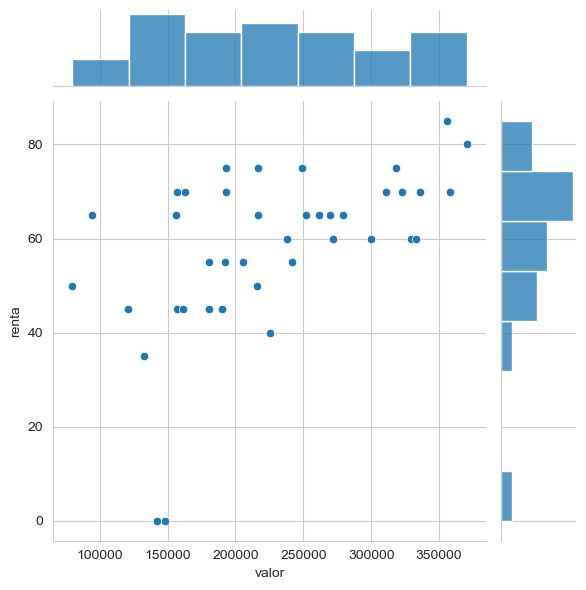

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.jointplot(data=df4, x='valor', y='renta')
plt.show()

Usando las librerías de python

In [74]:
from scipy import stats
slope, intercept, r, p, std_err = stats.linregress(df4['renta'], df4['valor'])
print(f"Slope = {slope:.3f}")
print(f"Intercept = {intercept:.3f}")
print(f"Std_err = {std_err:.3f}")
print(f"r^2 = {r**2:.3f}")

Slope = 2315.210
Intercept = 93105.302
Std_err = 596.896
r^2 = 0.284


<Axes: xlabel='renta', ylabel='valor'>

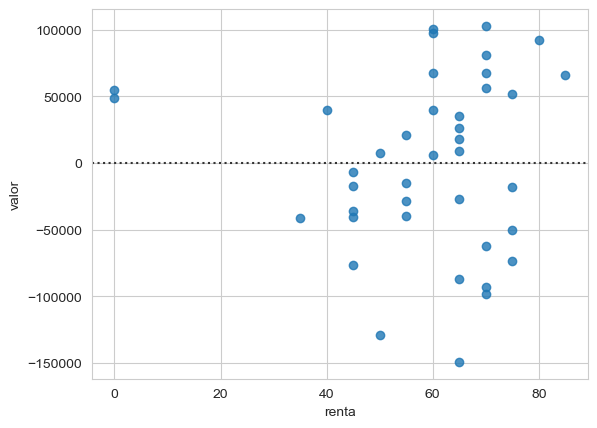

In [75]:
sns.residplot(data=df4, x="renta", y="valor")

### b. ¿Cuál es la signiﬁcancia de la regresión? (Valor-p del estadístico F.)

In [76]:
print(f"p = {p:.3f}")

p = 0.000


### c. Repita los incisos anteriores pero sin considerar los 2 casos donde y = 0. ¿Consideraría los nuevos coeﬁcientes estadíticamente iguales a los anteriores? Comente.

### d. Compare los coeﬁcientes de determinaci ́on R2 en ambos casos. Comente.

## 5. Determine cuáles de entre los siguientes modelos son lineales en los parámetros, en las variables, o en ambos ¿Cuáles de estos modelos son modelos de regresión lineal?

a) $Y_i = \beta_0 + \beta_1 \frac{1}{X_i} + \epsilon_i$

b) $Y_i = \beta_0 + \beta_1 ln(X_i) + \epsilon_i$

c) $Y_i = \beta_0 X_i^{\beta_1} + \epsilon_i$

d) $ln(Y_i) = \beta_0 + \beta_1 X_i + \epsilon_i$

e) $ln(Y_i) = ln(\beta_0) + \beta_1 ln(X_i) + \epsilon_i$

f) $Y_i = \beta_0 + \beta_1^3 X_i + \epsilon_i$

In [77]:
def func_a(b0 : float, b1: float, e: float, x: float):
    return (b0 + b1 * (1/x) + e)

def func_b(b0 : float, b1: float, e: float, x: float):
    return b0 + b1 * np.log(x) + e

def func_c(b0 : float, b1: float, e: float, x: float):
    return b0 * x ** b1 + e

def func_d(b0 : float, b1: float, e: float, x: float):
    return b0 + b1 * x + e

def func_e(b0 : float, b1: float, e: float, x: float):
    return np.log(b0) + b1 * np.log(x) + e

def func_f(b0 : float, b1: float, e: float, x: float):
    return b0 + b1 * x **3 + e

In [78]:
import pandas as pd
import numpy as np

# Definir el range_min, range_max y el número de puntos
range_min = 1.0
range_max = 10.0
num_points = 25  # Número de puntos

# Generar los valores de la columna 'x' usando linspace
x_values = np.linspace(range_min, range_max, num_points)

# Crear el DataFrame con la columna 'x'
df5 = pd.DataFrame({'x': x_values})

df5.describe()

,x
count,25.000000
mean,5.500000
std,2.759925
min,1.000000
25%,3.250000
50%,5.500000
75%,7.750000
max,10.000000


In [79]:
df5['y'] = df5['x']

# Evalute
b1 = 2.0
b0 = 2.0
e = 1.0

df5['y_a'] = df5.apply(lambda row: func_a(x=row['x'], b1=b1, b0=b0, e=e), axis=1)
df5['y_b'] = df5.apply(lambda row: func_b(x=row['x'], b1=b1, b0=b0, e=e), axis=1)
df5['y_c'] = df5.apply(lambda row: func_c(x=row['x'], b1=b1, b0=b0, e=e), axis=1)
df5['y_d'] = df5.apply(lambda row: np.log(func_d(x=row['x'], b1=b1, b0=b0, e=e)), axis=1)
df5['y_e'] = df5.apply(lambda row: np.log(func_e(x=row['x'], b1=b1, b0=b0, e=e)), axis=1)
df5['y_f'] = df5.apply(lambda row: func_f(x=row['x'], b1=b1, b0=b0, e=e), axis=1)

df5.head(5)

,x,y,y_a,y_b,y_c,y_d,y_e,y_f
0,1.000,1.000,5.000000,3.000000,3.00000,1.609438,0.526589,5.000000
1,1.375,1.375,4.454545,3.636907,4.78125,1.749200,0.845892,8.199219
2,1.750,1.750,4.142857,4.119232,7.12500,1.871802,1.034031,13.718750
3,2.125,2.125,3.941176,4.507544,10.03125,1.981001,1.163367,22.191406
4,2.500,2.500,3.800000,4.832581,13.50000,2.079442,1.260087,34.250000


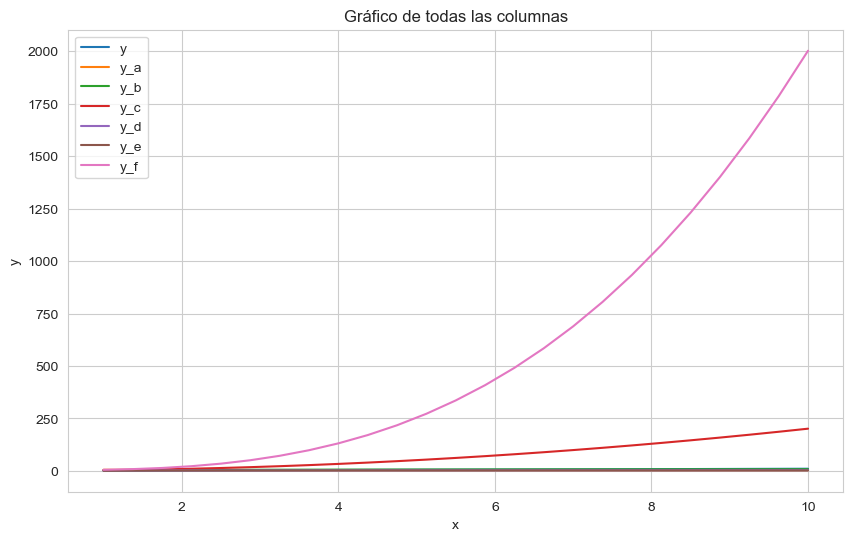

In [80]:
# Graficar todas las líneas
plt.figure(figsize=(10, 6))
for column in df5.columns[1:]:  # Omite la primera columna 'x'
    plt.plot(df5['x'], df5[column], label=column)

# Agregar etiquetas y leyenda
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfico de todas las columnas')
plt.legend()

# Mostrar el gráfico
plt.show()

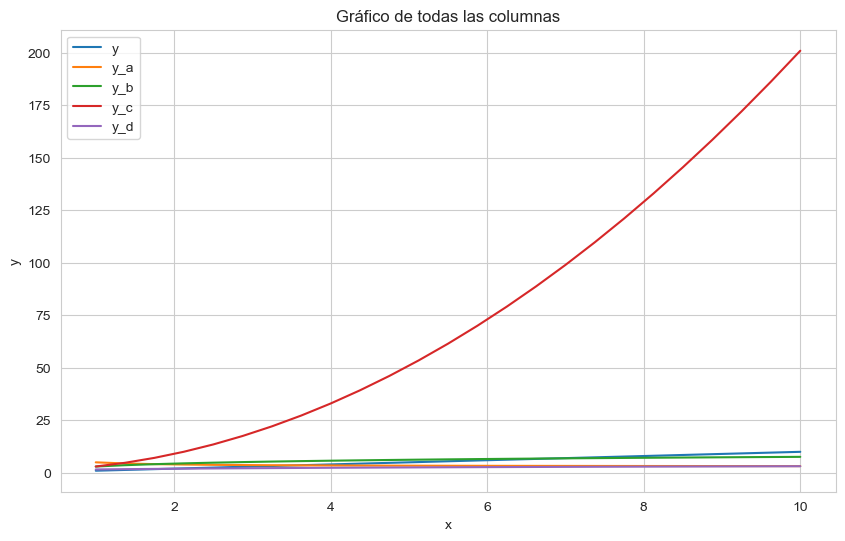

In [81]:
# Graficar todas las líneas
plt.figure(figsize=(10, 6))
for column in df5.columns[1:-2]:  # Omite la primera columna 'x'
    plt.plot(df5['x'], df5[column], label=column)

# Agregar etiquetas y leyenda
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfico de todas las columnas')
plt.legend()

# Mostrar el gráfico
plt.show()

Mediante las gráficas se puede ver que la única curva que tiene relación lineal corresponde a la función $c$ para cuando $b1 = 1$